In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from rdkit import Chem

import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./data/2020/df_smiles.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,pdbcode,affinity,pocket_smiles
0,3zzf,0.40,CC(C)C[C@@H](C=O)NC(=O)[C@H](CO)NC(=O)[C@@H](N...
1,3gww,0.45,CC(C)C[C@H](N)C(=O)N[C@H](C=O)Cc1ccc(O)cc1.CC(...
2,1w8l,0.49,CC(C)C[C@@H](C=O)NC(=O)[C@@H](N)Cc1c[nH]c2cccc...
3,3fqa,0.49,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)CNC(=O)[C@H](C)...
4,1zsb,0.60,CC(C)C[C@@H](C=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@@...


In [26]:
smi = df.pocket_smiles[1]
mol = Chem.MolFromSmiles(smi)

In [27]:
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

In [28]:
mol_nx = mol_to_nx(mol)

In [29]:
atom = nx.get_node_attributes(mol_nx, 'atom_symbol')
atom

{0: 'C',
 1: 'C',
 2: 'C',
 3: 'C',
 4: 'C',
 5: 'N',
 6: 'C',
 7: 'O',
 8: 'N',
 9: 'C',
 10: 'C',
 11: 'O',
 12: 'C',
 13: 'C',
 14: 'C',
 15: 'C',
 16: 'C',
 17: 'O',
 18: 'C',
 19: 'C',
 20: 'C',
 21: 'C',
 22: 'C',
 23: 'C',
 24: 'C',
 25: 'N',
 26: 'C',
 27: 'O',
 28: 'C',
 29: 'C',
 30: 'C',
 31: 'C',
 32: 'C',
 33: 'N',
 34: 'C',
 35: 'O',
 36: 'C',
 37: 'N',
 38: 'C',
 39: 'O',
 40: 'N',
 41: 'C',
 42: 'C',
 43: 'O',
 44: 'N',
 45: 'C',
 46: 'C',
 47: 'C',
 48: 'N',
 49: 'O',
 50: 'C',
 51: 'O',
 52: 'N',
 53: 'C',
 54: 'C',
 55: 'C',
 56: 'C',
 57: 'C',
 58: 'C',
 59: 'C',
 60: 'C',
 61: 'C',
 62: 'O',
 63: 'N',
 64: 'C',
 65: 'C',
 66: 'C',
 67: 'C',
 68: 'C',
 69: 'C',
 70: 'O',
 71: 'N',
 72: 'C',
 73: 'C',
 74: 'C',
 75: 'C',
 76: 'N',
 77: 'C',
 78: 'N',
 79: 'N',
 80: 'C',
 81: 'O',
 82: 'N',
 83: 'C',
 84: 'C',
 85: 'C',
 86: 'C',
 87: 'C',
 88: 'C',
 89: 'C',
 90: 'C',
 91: 'C',
 92: 'O',
 93: 'N',
 94: 'C',
 95: 'C',
 96: 'C',
 97: 'C',
 98: 'C',
 99: 'O',
 100: 'N',

In [30]:
color_map = {'C': 'cyan',
             'O': 'orange',
             'N': 'magenta'} 

mol_colors = []
for idx in mol_nx.nodes():
    if (mol_nx.nodes[idx]['atom_symbol'] in color_map):
        mol_colors.append(color_map[mol_nx.nodes[idx]['atom_symbol']])
    else:
        mol_colors.append('gray')

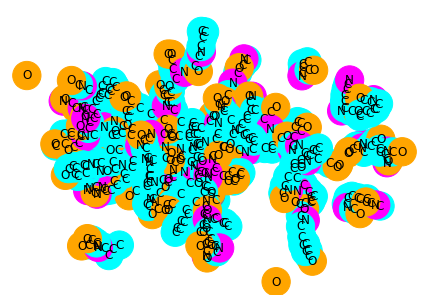

In [31]:
nx.draw(mol_nx,
        labels=atom,
        with_labels = True,
        node_color=mol_colors,
        node_size=800)

plt.show()

In [32]:
matrix = nx.to_numpy_matrix(mol_nx)
print(matrix)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
matrix.shape

(435, 435)

## Trying to draw ligand

In [2]:
df_base = pd.read_csv('./data/2020/base_df.csv')
df_base.drop(columns = ['Unnamed: 0'], inplace = True)
df_base.head()

,pdbcode,year,affinity,set,path,ligand_mol2,ligand_std,protein_pdb,pocket_pdb
0,3zzf,2012,0.40,general,./data/2020/sets/general-set/3zzf,./data/2020/sets/general-set/3zzf/3zzf_ligand....,./data/2020/sets/general-set/3zzf/3zzf_ligand.std,./data/2020/sets/general-set/3zzf/3zzf_protein...,./data/2020/sets/general-set/3zzf/3zzf_pocket.pdb
1,3gww,2009,0.45,general,./data/2020/sets/general-set/3gww,./data/2020/sets/general-set/3gww/3gww_ligand....,./data/2020/sets/general-set/3gww/3gww_ligand.std,./data/2020/sets/general-set/3gww/3gww_protein...,./data/2020/sets/general-set/3gww/3gww_pocket.pdb
2,1w8l,2004,0.49,general,./data/2020/sets/general-set/1w8l,./data/2020/sets/general-set/1w8l/1w8l_ligand....,./data/2020/sets/general-set/1w8l/1w8l_ligand.std,./data/2020/sets/general-set/1w8l/1w8l_protein...,./data/2020/sets/general-set/1w8l/1w8l_pocket.pdb
3,3fqa,2009,0.49,general,./data/2020/sets/general-set/3fqa,./data/2020/sets/general-set/3fqa/3fqa_ligand....,./data/2020/sets/general-set/3fqa/3fqa_ligand.std,./data/2020/sets/general-set/3fqa/3fqa_protein...,./data/2020/sets/general-set/3fqa/3fqa_pocket.pdb
4,1zsb,1996,0.60,general,./data/2020/sets/general-set/1zsb,./data/2020/sets/general-set/1zsb/1zsb_ligand....,./data/2020/sets/general-set/1zsb/1zsb_ligand.std,./data/2020/sets/general-set/1zsb/1zsb_protein...,./data/2020/sets/general-set/1zsb/1zsb_pocket.pdb


In [44]:
df_base.pocket_pdb[3]

'./data/2020/sets/general-set/3fqa/3fqa_pocket.pdb'

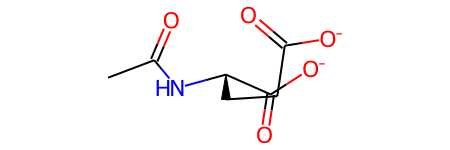

In [45]:
ligand = Chem.MolFromMol2File(df_base.ligand_mol2[0])
ligand

In [46]:
ligand_nx = mol_to_nx(ligand)
ligand_atom = nx.get_node_attributes(ligand_nx, 'atom_symbol')

color_map = {'C': 'cyan',
             'O': 'orange',
             'N': 'magenta'} 

ligand_colors = []
for idx in ligand_nx.nodes():
    if (ligand_nx.nodes[idx]['atom_symbol'] in color_map):
        ligand_colors.append(color_map[ligand_nx.nodes[idx]['atom_symbol']])
    else:
        ligand_colors.append('gray')

KeyError: 13

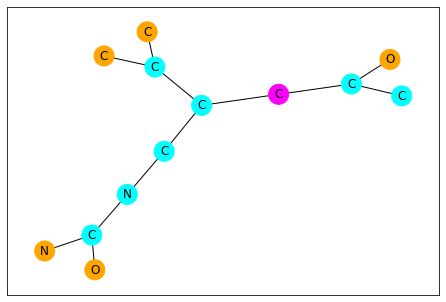

In [52]:
nx.draw(ligand_nx,
        labels=atom,
        with_labels = True,
        node_color=ligand_colors,
        node_size=400)

plt.show()

In [53]:
matrix = nx.to_numpy_matrix(ligand_nx)
print(matrix)

[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
